### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [15]:
sample_data.head(3)

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561


In [5]:
diff_drink = []
for _ in range(10000):
    sample2 = sample_data.sample(200, replace=True)
    yes_coffee = sample2.query('drinks_coffee == True')['height'].mean()
    no_coffee = sample2.query('drinks_coffee == False')['height'].mean()
    diff_drink.append(yes_coffee - no_coffee)

In [4]:
diff_drink[:2]

[1.3347071093073879, 1.3347071093073879]

In [12]:
confidence_interval = (np.percentile(diff_drink, 0.9), np.percentile(diff_drink,99.9))
confidence_interval

(0.21016834110906704, 2.7510932290858081)

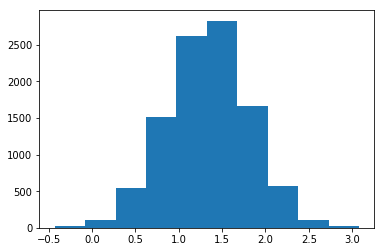

In [13]:
plt.hist(diff_drink);

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [16]:
sample_data.age.unique()

array(['<21', '>=21'], dtype=object)

In [27]:
diff_age = []
for _ in range (10000):
    sample3 = sample_data.sample(200, replace=True)
    older_21 = sample3.query('age == ">=21"')['height'].mean()
    younger_21 = sample3.query('age == "<21"')['height'].mean()
    diff_age.append(older_21-younger_21)

In [28]:
diff_age[:2]

[4.3843779647390448, 4.1365855759986516]

In [29]:
confidence_interval2 = (np.percentile(diff_age, 0.9), np.percentile(diff_age, 99.9))
confidence_interval2

(3.4562142234289435, 5.2807977203513605)

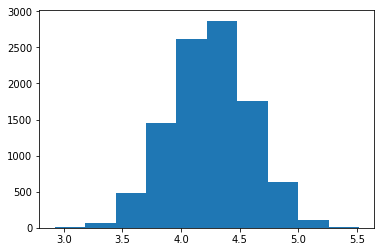

In [30]:
plt.hist(diff_age);

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [31]:
sample_data.age.unique()

array(['<21', '>=21'], dtype=object)

In [48]:
diff_under21_drink = []
for _ in range(10000):
    sample4 = sample_data.sample(200, replace=True)
    under21_yesCoffee = sample4[sample4.age == '<21'].query('drinks_coffee == True')['height'].mean()
    under21_noCoffee = sample4[sample4.age == '<21'].query('drinks_coffee == False')['height'].mean()
    diff_under21_drink.append(under21_noCoffee - under21_yesCoffee)

In [49]:
diff_under21_drink[:2]

[1.6550691695018784, 1.8082265909940247]

In [50]:
confidence_interval3 = (np.percentile(diff_under21_drink, 2.5), np.percentile(diff_under21_drink, 97.5))
confidence_interval3

(1.076434407538406, 2.6135233884205724)

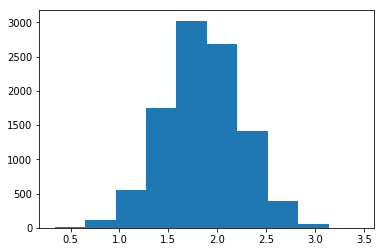

In [52]:
plt.hist(diff_under21_drink);

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [57]:
diff_above21_drink = []
for _ in range(10000):
    sample4 = sample_data.sample(200, replace=True)
    above21_yesCoffee = sample4[sample4.age == '>=21'].query('drinks_coffee == True')['height'].mean()
    above21_noCoffee = sample4[sample4.age == '>=21'].query('drinks_coffee == False')['height'].mean()
    diff_above21_drink.append(above21_noCoffee - above21_yesCoffee)

In [58]:
diff_above21_drink[:2]

[3.5566714906439074, 3.1721122392949042]

In [59]:
confidence_interval4 = (np.percentile(diff_above21_drink, 2.5), np.percentile(diff_above21_drink, 97.5))
confidence_interval4

(1.8328191259530318, 4.3854748141999229)

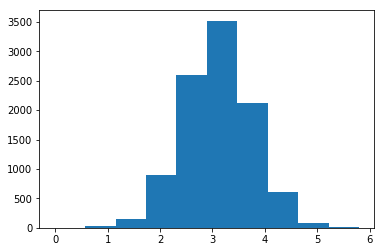

In [60]:
plt.hist(diff_above21_drink);